In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = torch.linspace(-1,1,200).reshape(-1,1)

In [3]:
y=(np.sin(5*(np.pi*X)))/((5*(np.pi*X)))

In [4]:
class Model(nn.Module):
    def __init__(self, i=1, a2=5, a3=10,a4=10,a5=10,a6=10,a7=10,a8=5, o=1):
        super().__init__()
        self.f1 = nn.Linear(i,a2)    
        self.f2 = nn.Linear(a2, a3)
        self.f3 = nn.Linear(a3, a4)
        self.f4 = nn.Linear(a4, a5)
        self.f5 = nn.Linear(a5, a6)
        self.f6 = nn.Linear(a6, a7)
        self.f7 = nn.Linear(a7, a8)
        self.out = nn.Linear(a8,o)
    def forward(self, x):
        x = F.relu(self.f1(x))
        x = F.relu(self.f2(x))
        x = F.relu(self.f3(x))
        x = F.relu(self.f4(x))
        x = F.relu(self.f5(x))
        x = F.relu(self.f6(x))
        x = F.relu(self.f7(x))
        x = self.out(x)
        return x

In [5]:
model = Model()

In [6]:
CriterionLoss = nn.MSELoss()

In [7]:
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
epochs = 300
losses = []
grad_norm_list=[]

for i in range(epochs):
    i+=1
    # feed forwarding
    y_prediction = model.forward(X)
    
    # calculate loss
    tloss = CriterionLoss(y_prediction, y)
    losses.append(tloss)
    
    optim.zero_grad()
    tloss.backward()
    
    optim.step()
    
    # Get gradient norm (From slides)
    grad_all = 0.0
    for z in model.parameters():
        grad = 0.0
        if z.grad is not None:
            grad = (z.grad.cpu().data.numpy() ** 2).sum()
        grad_all += grad
    grad_norm = grad_all ** 0.5
    grad_norm_list.append(grad_norm)

In [9]:
losses=torch.tensor(losses)

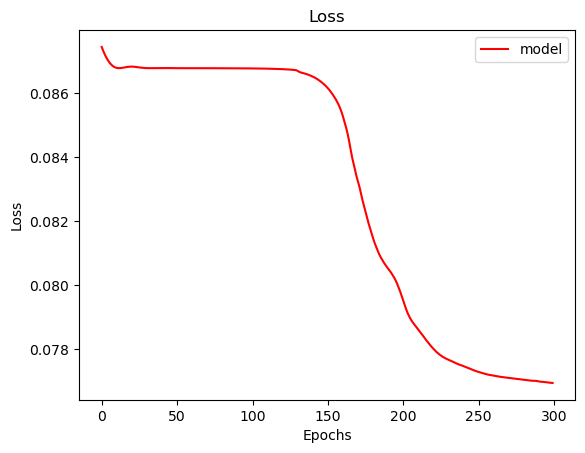

In [10]:
plt.plot(range(epochs), losses.numpy(), 'r', label='model')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

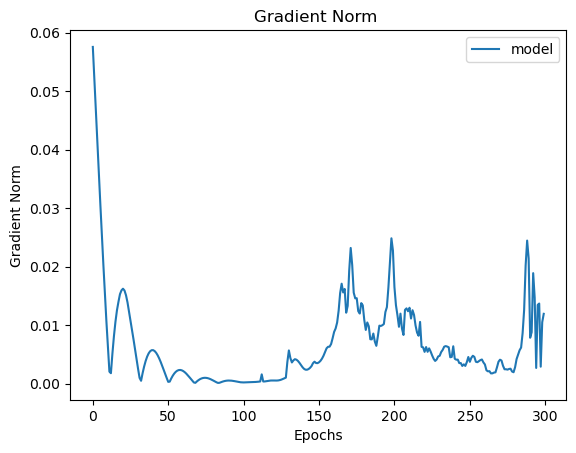

In [11]:
#Gradient norm to iterations
plt.plot(range(epochs), grad_norm_list,label='model')
plt.title("Gradient Norm ")
plt.xlabel("Epochs")
plt.ylabel("Gradient Norm")
plt.legend(loc="upper right")
plt.show()